In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:
# Step 1: Create a synthetic image with two objects
img = np.zeros((100, 100), dtype=np.uint8)
img[20:40, 20:40] = 85       # Object 1
img[60:80, 60:80] = 170      # Object 2


In [3]:
# Step 2: Add Gaussian noise
mean = 0
std_dev = 15
noise = np.random.normal(mean, std_dev, img.shape).astype(np.float32)
noisy_img = np.clip(img.astype(np.float32) + noise, 0, 255).astype(np.uint8)


In [4]:
# Step 3: Region Growing Algorithm
def region_growing(img, seeds, threshold=15):
    height, width = img.shape
    segmented = np.zeros((height, width), dtype=np.uint8)
    visited = np.zeros((height, width), dtype=bool)

    for seed in seeds:
        queue = deque([seed])
        seed_value = img[seed]

        while queue:
            x, y = queue.popleft()
            if visited[x, y]:
                continue

            visited[x, y] = True
            pixel_value = img[x, y]

            if abs(int(pixel_value) - int(seed_value)) <= threshold:
                segmented[x, y] = 255

                # Check 8-connected neighbors
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                            queue.append((nx, ny))

    return segmented

In [5]:
# Step 4: Define seed points and apply region growing
seeds = [(25, 25), (65, 65)]  # One seed per object
result = region_growing(noisy_img, seeds, threshold=20)


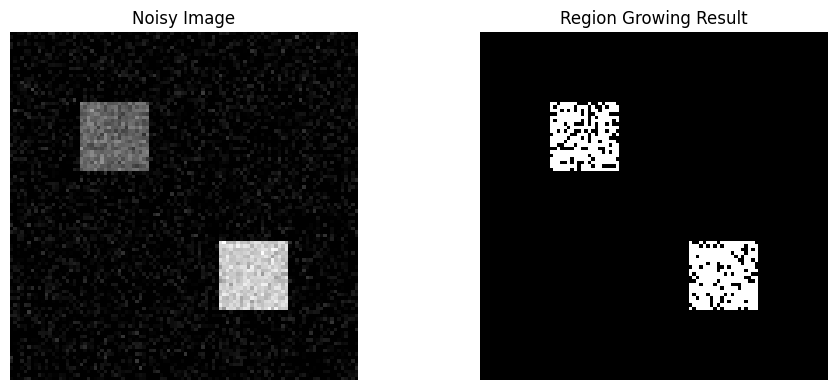

In [6]:
# Step 5: Display results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Region Growing Result")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()